In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [4]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
48,23,M,NORMAL,HIGH,31.686,drugY
188,65,M,HIGH,NORMAL,34.997,drugY
118,32,F,HIGH,NORMAL,10.292,drugA
35,46,M,NORMAL,NORMAL,7.285,drugX
85,59,M,HIGH,HIGH,13.935,drugB
126,66,M,HIGH,HIGH,16.347,drugY
146,37,F,LOW,NORMAL,12.006,drugX
119,61,F,HIGH,HIGH,25.475,drugY
138,51,M,HIGH,NORMAL,11.343,drugB
77,26,F,HIGH,NORMAL,19.161,drugY


In [6]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
104,22,1,0,1,28.294,drugY
143,74,1,0,1,15.436,drugY
14,50,0,2,0,12.703,drugX
194,46,0,0,0,34.686,drugY
1,47,1,1,0,13.093,drugC
6,49,0,2,0,16.275,drugY
28,39,0,1,1,22.697,drugY
169,20,0,0,0,11.262,drugA
195,56,0,1,0,11.567,drugC
101,45,0,0,0,12.854,drugA


In [9]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [10]:
y = df['Drug'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=65)

In [13]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = tree_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.95      0.98        22
       drugY       0.97      1.00      0.99        35

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [21]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9875


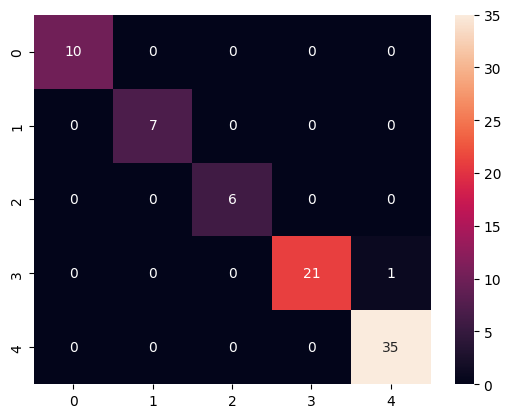

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [23]:
predict = cross_val_predict(estimator=tree_model, X=X, y=y, cv=5)
print(classification_report(y, predict))

              precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



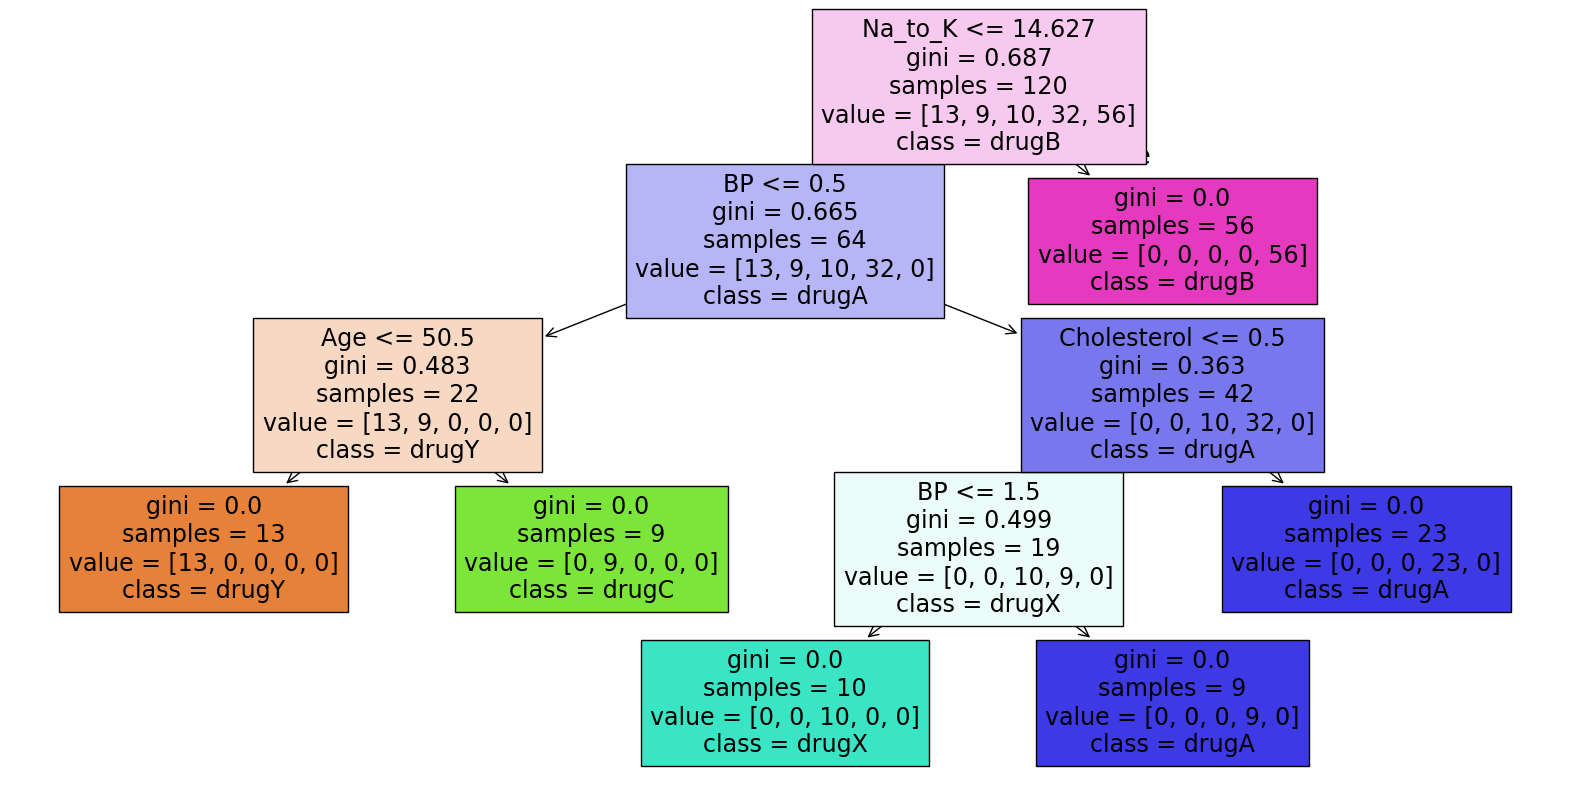

In [26]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=clos, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.9875


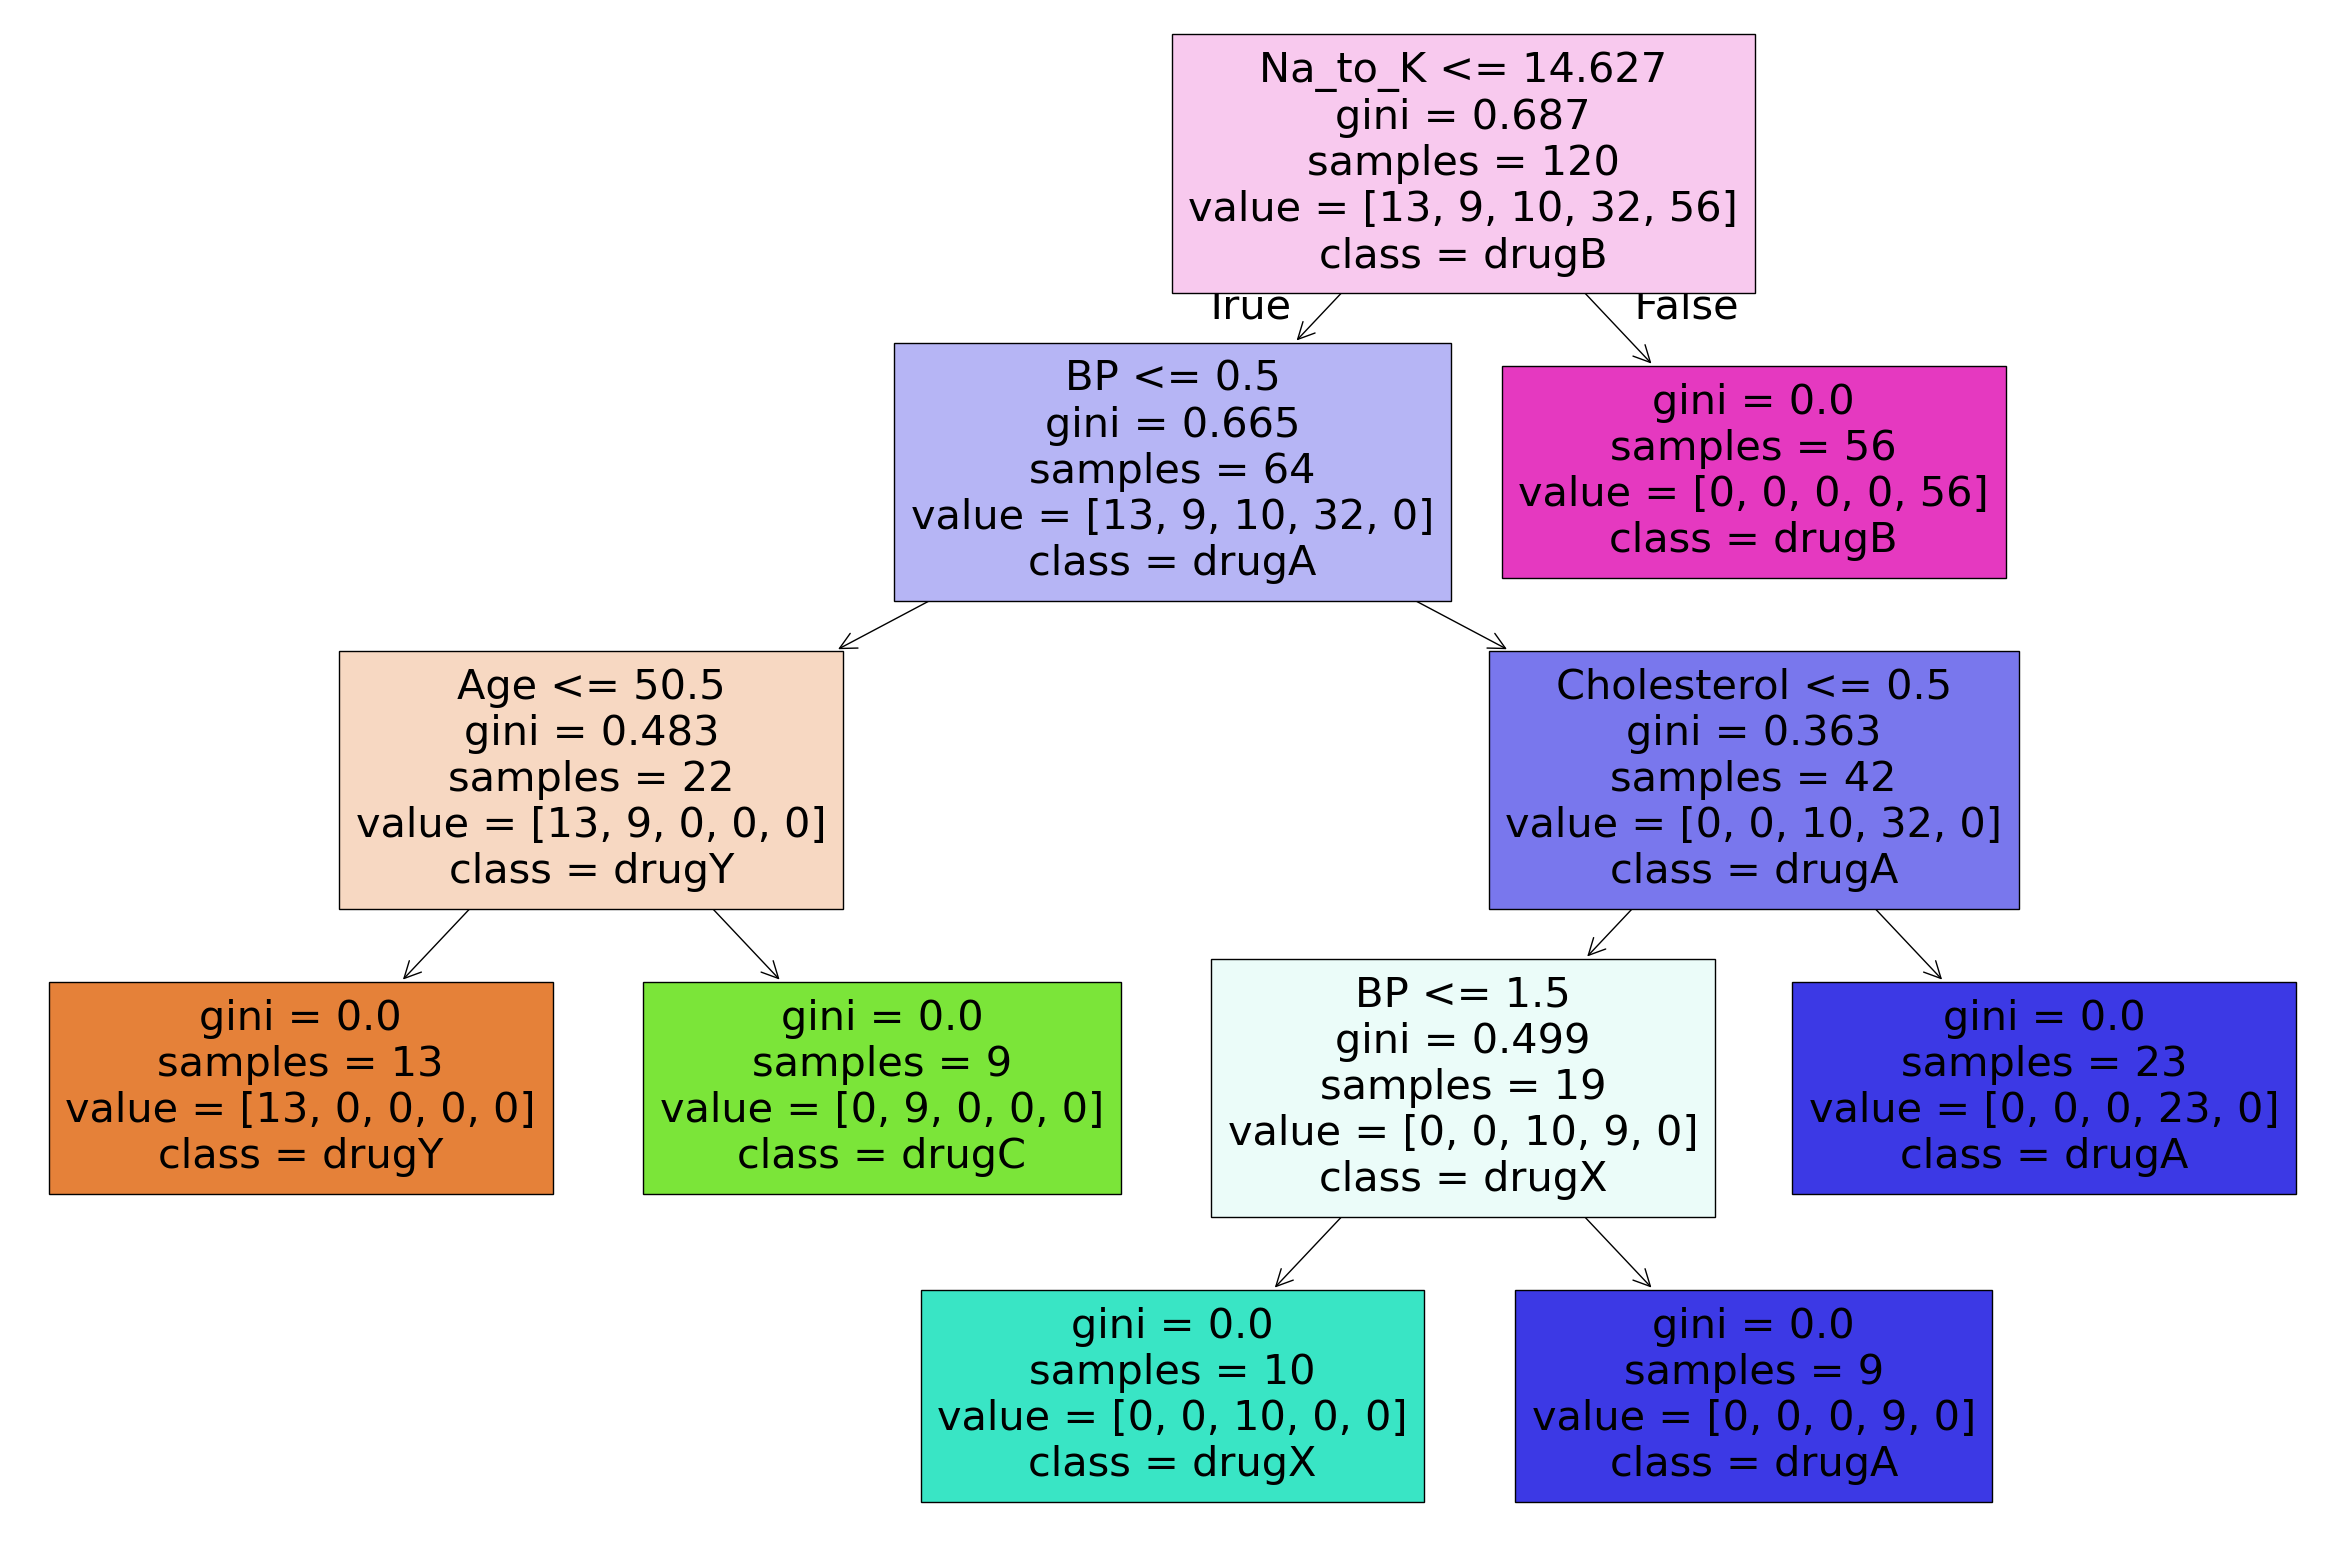

In [27]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.85


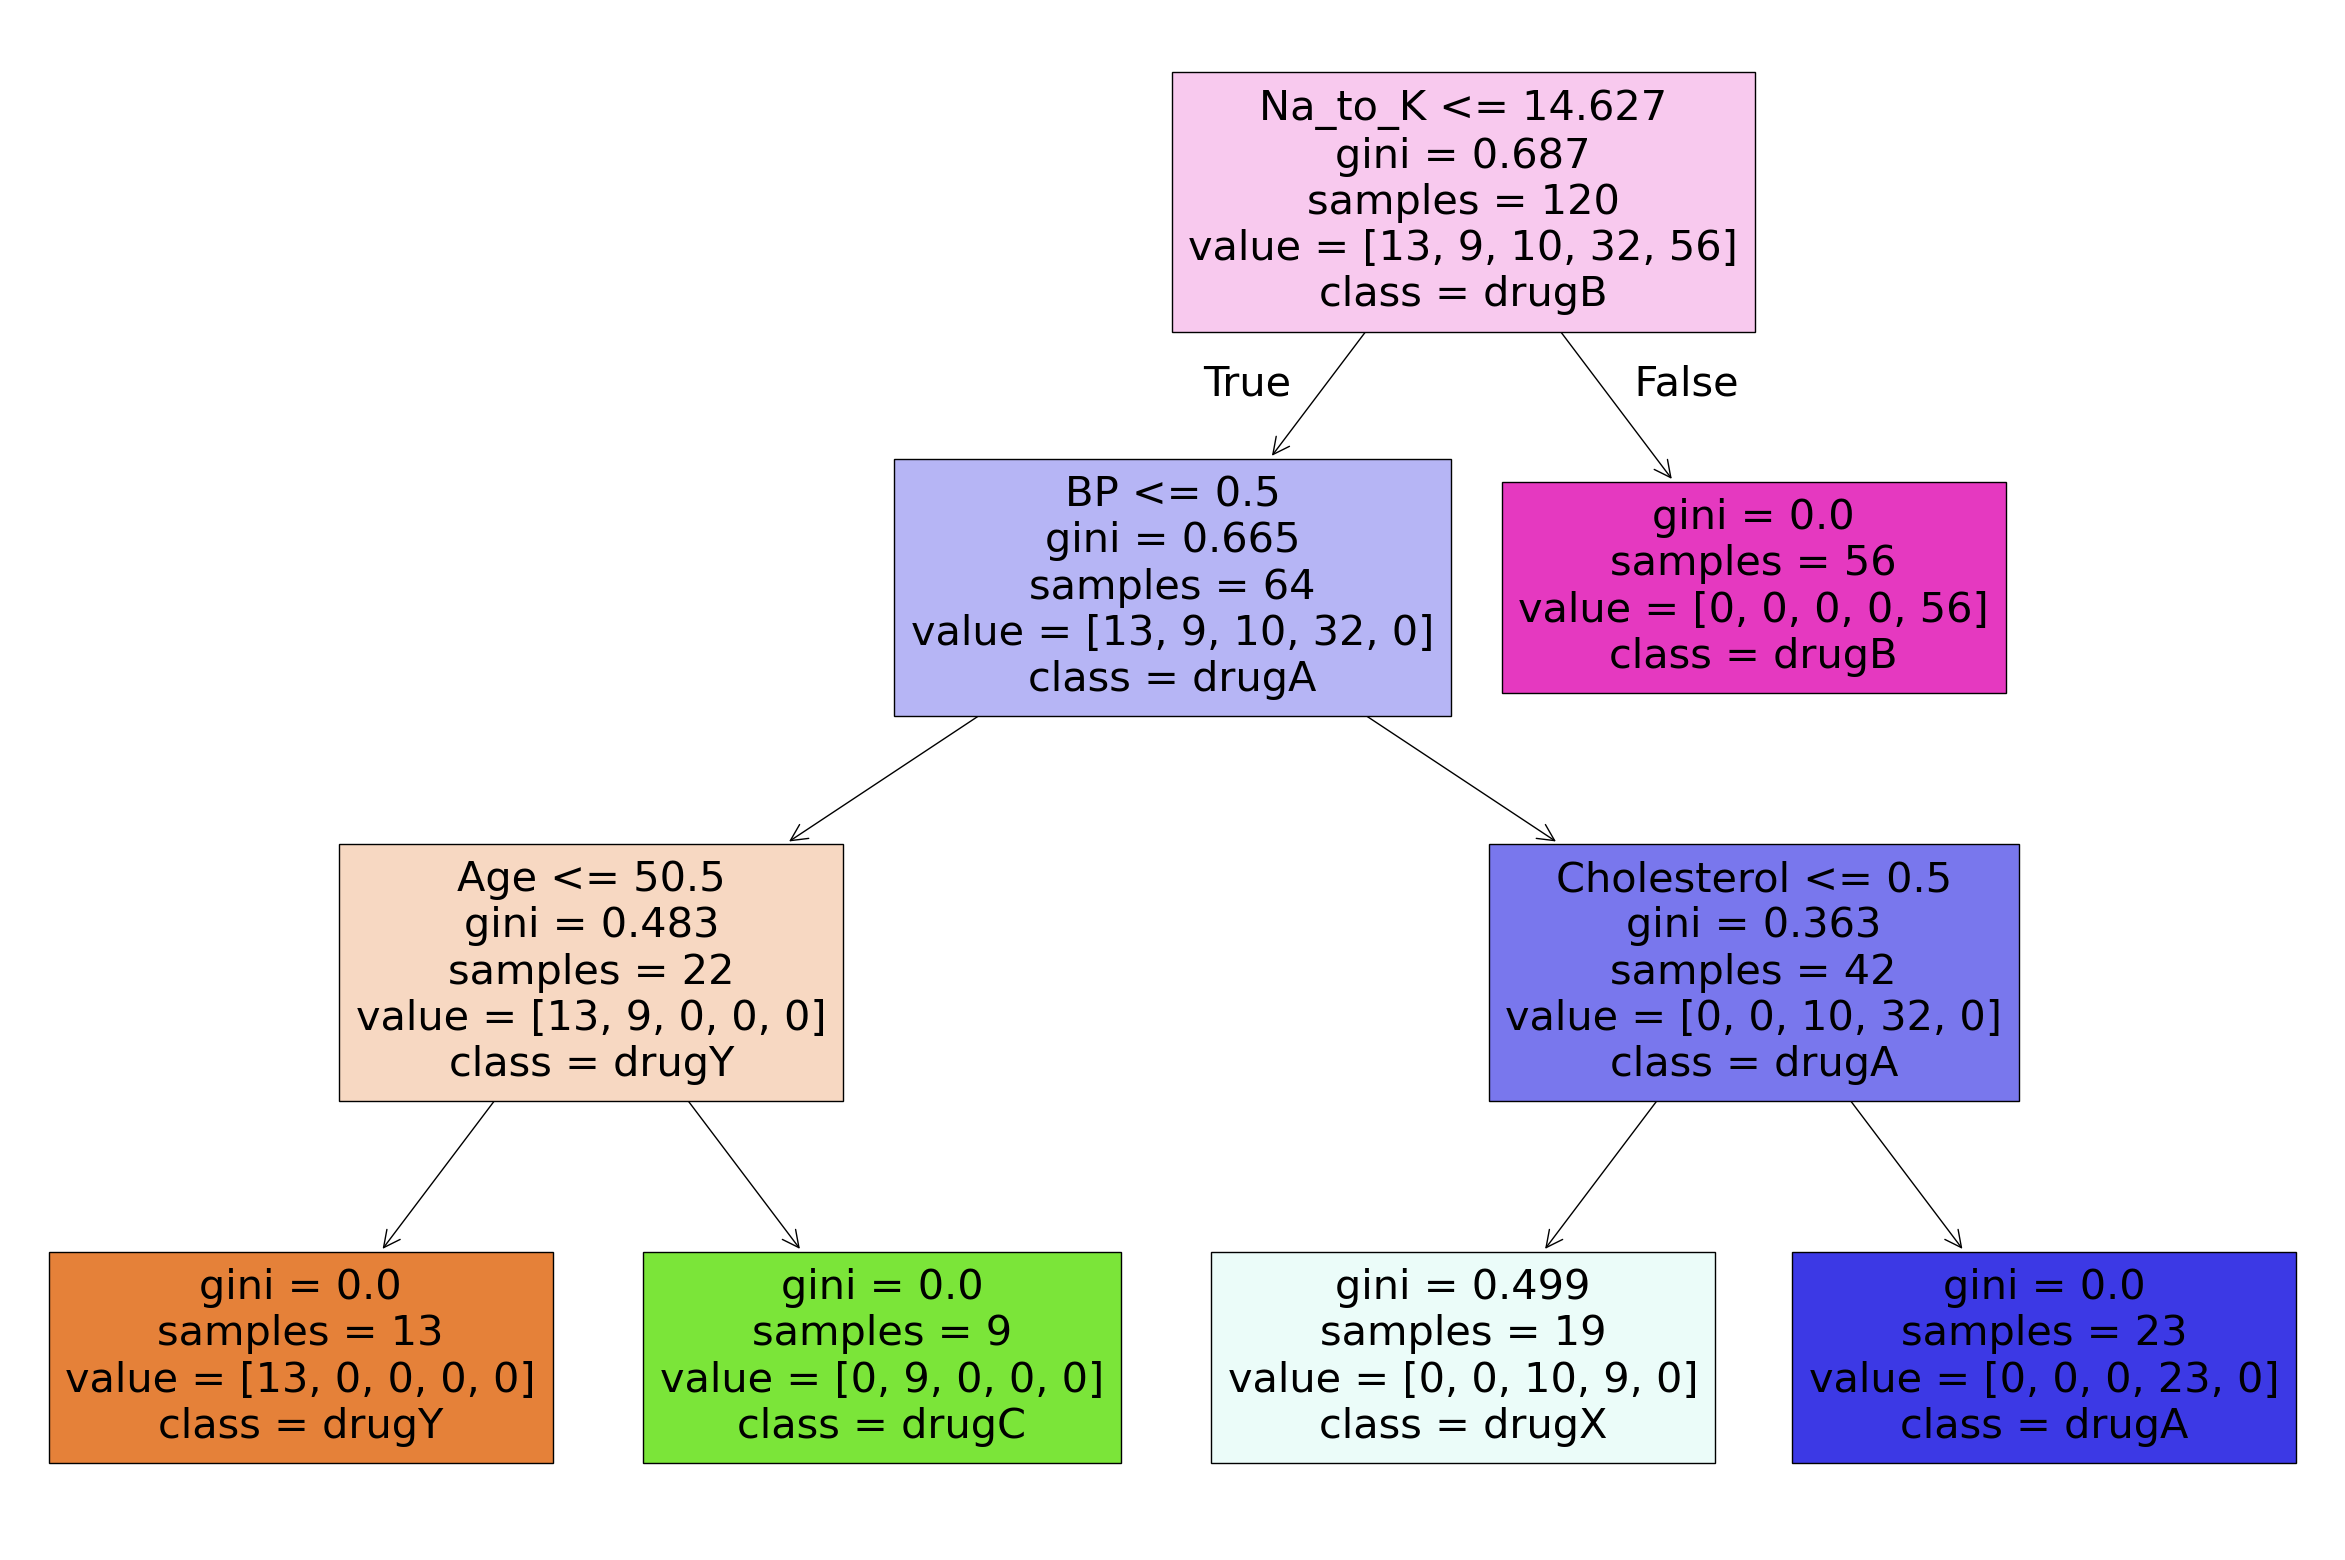

In [28]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [ ]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()